In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, glob

import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats

from helpers import catch, multi_load_logs_as_df, annotate, weight_map, metric_names, reduce_df, ceilings, condition_names, add_r_and_p

In [3]:
# make the SVG figures pliable
import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
plt.rcParams['svg.fonttype'] = 'none'

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
def mix_ratio_map(mix_ratio):
    ratio_map = {
        '0' : '0:100', 
        '0.03125' : '3:100',
        '0.0625' : '6:100',
        '0.125' : '12:100', 
        '0.25' : '25:100', 
        '0.5' : '50:100',  
        '1' : '100:100', 
    }
    return ratio_map[mix_ratio]

In [5]:
logdir = '/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0'
logdir = '/work/upschrimpf1/bocini/domain-transfer/IT-fitting/logs'
event_paths = [y for x in os.walk(logdir) for y in glob.glob(os.path.join(x[0], 'events*'))]
df = multi_load_logs_as_df(event_paths)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [40]:
df.head()

,metric,value,step,batch_size,num_nodes,hparams/adapt_bn_to_stim,hparams/stimuli,train_eps,hparams/scale,datamodule,...,statedict_path,hparams/test,benchmarks,fit_animals,hparams/optim,hparams/record_time,hparams/arch,regions,hparams/statedict_path,path
0,hp_metric,-1.000000,0.0,128.0,1.0,1.0,All,0.00098,"(0.9, 1.1)","['ImageNet', 'NeuralData']",...,220505-final-labels_0-mix_1/trained_models/mod...,0.0,"['fneurons.ustimuli', 'magneto.var6', 'nano.va...",['All'],sgd,0.0,cornet_s,['IT'],220505-final-labels_0-mix_1/trained_models/mod...,/work/upschrimpf1/bocini/domain-transfer/IT-fi...
0,ImageNet_val_loss,0.796903,0.0,128.0,1.0,1.0,All,0.00098,"(0.9, 1.1)","['ImageNet', 'NeuralData']",...,220505-final-labels_0-mix_1/trained_models/mod...,0.0,"['fneurons.ustimuli', 'magneto.var6', 'nano.va...",['All'],sgd,0.0,cornet_s,['IT'],220505-final-labels_0-mix_1/trained_models/mod...,/work/upschrimpf1/bocini/domain-transfer/IT-fi...
0,ImageNet_val_acc1,0.799279,0.0,128.0,1.0,1.0,All,0.00098,"(0.9, 1.1)","['ImageNet', 'NeuralData']",...,220505-final-labels_0-mix_1/trained_models/mod...,0.0,"['fneurons.ustimuli', 'magneto.var6', 'nano.va...",['All'],sgd,0.0,cornet_s,['IT'],220505-final-labels_0-mix_1/trained_models/mod...,/work/upschrimpf1/bocini/domain-transfer/IT-fi...
0,ImageNet_val_acc5,0.939303,0.0,128.0,1.0,1.0,All,0.00098,"(0.9, 1.1)","['ImageNet', 'NeuralData']",...,220505-final-labels_0-mix_1/trained_models/mod...,0.0,"['fneurons.ustimuli', 'magneto.var6', 'nano.va...",['All'],sgd,0.0,cornet_s,['IT'],220505-final-labels_0-mix_1/trained_models/mod...,/work/upschrimpf1/bocini/domain-transfer/IT-fi...
0,ImageNet_adv_val_loss,1.802744,0.0,128.0,1.0,1.0,All,0.00098,"(0.9, 1.1)","['ImageNet', 'NeuralData']",...,220505-final-labels_0-mix_1/trained_models/mod...,0.0,"['fneurons.ustimuli', 'magneto.var6', 'nano.va...",['All'],sgd,0.0,cornet_s,['IT'],220505-final-labels_0-mix_1/trained_models/mod...,/work/upschrimpf1/bocini/domain-transfer/IT-fi...


In [41]:
for i in df.metric.unique():
    if 'dicarlo.Rajalingham2018-i2n_acc' in i:
        print(i)

In [9]:
df.query('metric=="Igustibagus2024.IT_readout-accuracy"')

,metric,value,step,BS_benchmarks,momentum,hparams/save_path,hparams/behavior_train_transform,datamodule,pretrained,hparams/v_num,...,batch_size,save_top_k,behavior_train_transform,hparams/weight_decay,statedict_path,weight_decay,hparams/shear,benchmarks,multi_bn,path


In [43]:
logdir = '/work/upschrimpf1/bocini/domain-transfer/IT-fitting/logs/'
df['weight_path'] = df['path'].apply(lambda x: x.replace(logdir, '').split('events')[0])
df['version'] = df['path'].apply(lambda x : x.split('version_')[1].split('/')[0])
df['fit'] = df['loss_weights'].apply(weight_map)
# they all have the same condition for us, so it doesn't really matter
df['cond'] = df['path'].apply(lambda x:x.split('/')[8])
## I don't think we need any of these
# df['condition'] = df['cond'].apply(lambda x : x.split('-final-')[1].split('-mix')[0])
# df['condition'] = df['condition'].apply(lambda x : condition_names[x])
# df['Loss'] = df['condition']
df['mix_ratio'] = df['cond'].apply(lambda x: mix_ratio_map('1'))
df['labels'] = '1'

In [42]:
for m in df.metric.unique():
    if 'CKA' in m:
        print(m)

CKA_fneurons.ustimuli
CKA_magneto.var6
CKA_magneto.left.var6
CKA_nano.var6
CKA_nano.left.var6
logCKA_train


In [46]:
groupby_cols = [
    'metric', 'seed', 'fit', 
    'loss_weights', 'cond',
    'mix_ratio', 'neural_loss',
    'weight_path'
]
df.groupby(groupby_cols).count().head()

,,,,,,,,value,step,batch_size,num_nodes,hparams/adapt_bn_to_stim,hparams/stimuli,train_eps,hparams/scale,datamodule,neuraldataset,...,benchmarks,fit_animals,hparams/optim,hparams/record_time,hparams/arch,regions,hparams/statedict_path,path,version,labels
metric,seed,fit,loss_weights,cond,mix_ratio,neural_loss,weight_path,,,,,,,,,,,,,,,,,,,,,
CKA_fneurons.ustimuli,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/old-logs/220505-final-labels_0-mix_1/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5/version_0/,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
CKA_magneto.left.var6,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/old-logs/220505-final-labels_0-mix_1/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5/version_0/,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
CKA_magneto.var6,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/old-logs/220505-final-labels_0-mix_1/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5/version_0/,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
CKA_nano.left.var6,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/old-logs/220505-final-labels_0-mix_1/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5/version_0/,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
CKA_nano.var6,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/old-logs/220505-final-labels_0-mix_1/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5/version_0/,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


In [13]:
df.groupby(groupby_cols).count()

,,,,,,,,value,step,BS_benchmarks,momentum,hparams/save_path,hparams/behavior_train_transform,datamodule,pretrained,hparams/v_num,hparams/save_top_k,...,behavior_train_transform,hparams/weight_decay,statedict_path,weight_decay,hparams/shear,benchmarks,multi_bn,path,version,labels
metric,seed,fit,loss_weights,cond,mix_ratio,neural_loss,weight_path,,,,,,,,,,,,,,,,,,,,,
CKA_bento.coco,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
CKA_fneurons.ustimuli,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
CKA_magneto.left.var6,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
CKA_magneto.var6,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
CKA_nano.coco,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
CKA_nano.left.var6,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
CKA_nano.var6,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
ImageNet_adv_val_acc1,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
ImageNet_adv_val_acc5,5.0,"ImageNet, IT,","[1.0, 1.0, 0.0]",version_0,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fitting/mylogs/model_cornet_s-loss_logCKA-ds_sachimajajhongpublic-fanimals_All-neurons_All-stimuli_All-seed_5-seedneurons_42/version_0/,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


In [47]:
df_ = df.groupby(groupby_cols).filter(lambda x:len(x) in [36])
data = df_.groupby(groupby_cols).apply(
    lambda x:x.pivot(index='step', columns='metric', values='value')
).reset_index()

In [49]:
data['CKA_fneurons.ustimuli'] = 1-data['CKA_fneurons.ustimuli']
data['CKA_magneto.var6'] = 1-data['CKA_magneto.var6']
data['CKA_nano.var6'] = 1-data['CKA_nano.var6']
data['CKA_magneto.var6_ceiled'] = data['CKA_magneto.var6'] / ceilings['CKA_magneto.var6']
data['CKA_nano.var6_ceiled'] = data['CKA_nano.var6'] / ceilings['CKA_nano.var6']
data['CKA_nano.left.var6'] = 1-data['CKA_nano.left.var6']
# data['CKA_nano.coco'] = 1-data['CKA_nano.coco'] 
# data['CKA_bento.coco'] = 1-data['CKA_bento.coco'] 
# data['CKA_nano.coco_ceiled'] = data['CKA_nano.coco'] / ceilings['CKA_nano.coco']
# data['CKA_bento.coco_ceiled'] = data['CKA_bento.coco'] / ceilings['CKA_bento.coco']
data['seed'] = data['seed'].astype(int)
data['fit'] = data['loss_weights'].apply(weight_map)
data['labels'] = data['loss_weights'].apply(lambda x:eval(x)[-1]==1)

# merges all the metrics to the same row instead of having them long form.
data = reduce_df(data)

# and compute averaged metric scores
data['averaged_ceiled_CKA'] = np.mean([
    data[metric].values
    for metric in 
    ['CKA_magneto.var6_ceiled',
     'CKA_nano.var6_ceiled', 
    #  'CKA_nano.coco_ceiled',
    #  'CKA_bento.coco_ceiled'
     ]
], axis=0)

data['averaged_ceiled_CKA_HVM'] = np.mean([
    data[metric].values
    for metric in 
    ['CKA_magneto.var6_ceiled',
     'CKA_nano.var6_ceiled']
], axis=0)

# data['averaged_ceiled_CKA_COCO'] = np.mean([
#     data[metric].values
#     for metric in 
#     ['CKA_nano.coco_ceiled',
#      'CKA_bento.coco_ceiled']
# ], axis=0)

data['normalized_adv_val'] = data['ImageNet_adv_val_acc1']/data['ImageNet_val_acc1']
data.to_csv('final_model_results.csv')

In [50]:
data.head()

,seed,fit,loss_weights,cond,mix_ratio,neural_loss,weight_path,step,CKA_fneurons.ustimuli,labels,...,CKA_nano.var6_ceiled,ImageNet_adv_val_acc1,ImageNet_adv_val_acc5,ImageNet_adv_val_loss,ImageNet_val_acc1,ImageNet_val_acc5,ImageNet_val_loss,averaged_ceiled_CKA,averaged_ceiled_CKA_HVM,normalized_adv_val
0,5,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpu...,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fi...,0.0,0.641872,False,...,0.760218,0.575721,0.860577,1.802744,0.799279,0.939303,0.796903,0.932973,0.932973,0.720301
1,5,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpu...,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fi...,659.0,0.637926,False,...,0.751856,0.446114,0.760216,2.644974,0.736378,0.914263,1.050608,0.924532,0.924532,0.605822
2,5,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpu...,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fi...,1319.0,0.635446,False,...,0.751942,0.440505,0.763221,2.636994,0.739984,0.914463,1.037904,0.923260,0.923260,0.595290
3,5,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpu...,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fi...,1979.0,0.638358,False,...,0.742523,0.453325,0.770833,2.594751,0.742388,0.918470,1.017439,0.923133,0.923133,0.610631
4,5,"ImageNet, IT,","[1.0, 1.0, 0.0]",model_cornet_s-loss_logCKA-ds_sachimajajhongpu...,100:100,logCKA,/work/upschrimpf1/bocini/domain-transfer/IT-fi...,2639.0,0.431232,False,...,0.639139,0.444912,0.757812,2.601196,0.727764,0.909255,1.090992,0.824336,0.824336,0.611340


In [51]:
for i in data.columns:
    if 'adv' in i:
        print(i)

ImageNet_adv_val_acc1
ImageNet_adv_val_acc5
ImageNet_adv_val_loss
normalized_adv_val


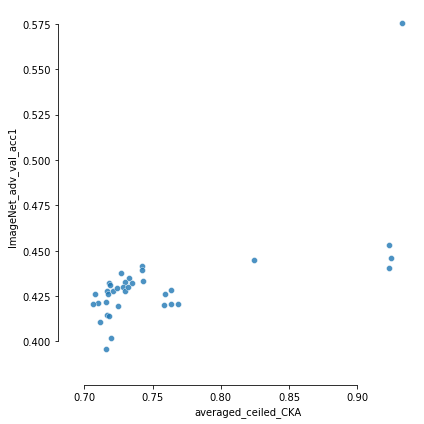

In [54]:
# filter samples that have lost more than 2% accuracy (from a retrained linear readout)
import seaborn as sns
import matplotlib.pyplot as plt

data_ = pd.concat([
        data[
            #(data['step']>1970)&
            (data['neural_loss'].isin(['logCKA']))
        ]])

X = 'averaged_ceiled_CKA'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

data__ = data_

ax = sns.scatterplot(
    #hue='condition',
    x=X, y='ImageNet_adv_val_acc1', 
    data=data__, ax=ax,
    alpha=0.8,
    clip_on=False
)

# ax.set_ylabel(metric_names[plot_metric])
# ax.set_xlabel(metric_names[X])
sns.despine(offset=20, trim=True)

#plt.axvline(x=start, linestyle='--')
# X_name = metric_names[X].split('\n')[0]
# Y_name = metric_names[plot_metric].split('\n')[0]
# title = f'{X_name} vs {Y_name}'
# ax.set_title(title)
#         ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.tight_layout()
# plt.savefig(f'{title}.svg', format='svg')
